In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''Random readings of integers for testing purpose... For actual run, please comment this section
df = []
for i in range(1000):
    df.append(np.random.randint(1, 15))

#Comment above for actual run'''


'Random readings of integers for testing purpose... For actual run, please comment this section\ndf = []\nfor i in range(1000):\n    df.append(np.random.randint(1, 15))\n\n#Comment above for actual run'

In [3]:
#The dataset must be preprocessed and scaled as per the given 'error_threshold' value.
#This snippet is taking all the datasets and then making numpy datasets

heart_rate = "HR.csv"
eda = "EDA.csv"
acc = "ACC.csv"
ibi = "IBI.csv"
temp = "TEMP.csv"
dia = "diabeties.csv"
pulse = "pulse.csv"
spo2 = "SpO2.csv"

#d = np.fromfile(filepath)

df_hr_ = pd.read_csv(heart_rate)
df_eda_ = pd.read_csv(eda)
df_ibi_ = pd.read_csv(ibi)
df_acc_ = pd.read_csv(acc)
df_temp_ = pd.read_csv(temp)
df_dia_ = pd.read_csv(dia) 
df_pulse_ = pd.read_csv(pulse)
df_spo2_ = pd.read_csv(spo2)


df_list_ = [df_hr_, df_eda_, df_ibi_, df_acc_, df_temp_, df_dia_, df_pulse_, df_spo2_]



df_hr = df_hr_.to_numpy()
df_eda = df_eda_.to_numpy()
df_ibi= df_ibi_.iloc[:, [1]].to_numpy()
df_acc = df_acc_.iloc[:, [0]].to_numpy() #Accelerometer data only in x-axis
df_acc[:] += 200
df_temp = df_temp_.to_numpy()
df_dia = df_dia_.to_numpy()
df_pulse = df_pulse_.to_numpy()
df_spo2 = df_spo2_.to_numpy()


df_list = [df_hr, df_eda, df_ibi, df_acc, df_temp, df_dia, df_pulse, df_spo2]



for df in df_list_:
    print("Size of Dataframe " + str(df.shape))
    #print(df.head())
    print(df.describe())


Size of Dataframe (7709, 1)
             97.20
count  7709.000000
mean     69.407696
std      15.195030
min      49.800000
25%      57.630000
50%      65.770000
75%      75.600000
max     127.900000
Size of Dataframe (30894, 1)
           4.000000
count  30894.000000
mean       1.603237
std        1.850925
min        0.000000
25%        0.387206
50%        0.526931
75%        2.525280
max        8.792326
Size of Dataframe (1919, 2)
         10.672364     0.953169
count  1919.000000  1919.000000
mean   3165.581938     1.034685
std    2233.886305     0.175950
min      19.454015     0.468771
25%     973.372680     0.921917
50%    2586.259008     1.046923
75%    5243.099374     1.171929
max    7541.204569     1.609449
Size of Dataframe (247151, 3)
                 -27              4             57
count  247151.000000  247151.000000  247151.000000
mean      -43.416854       9.337122      14.762724
std        16.492503      33.430062      25.268635
min      -128.000000    -128.000000    -12

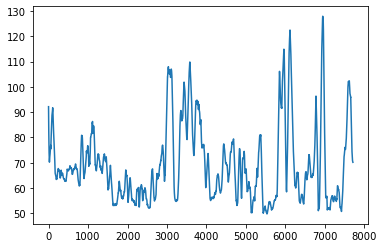

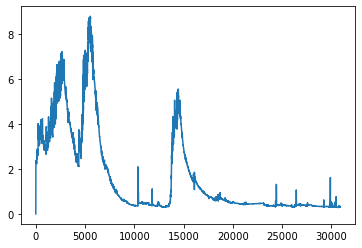

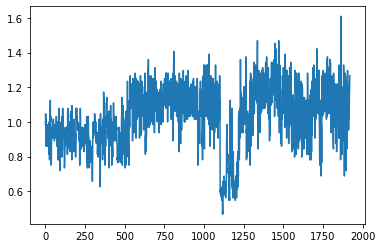

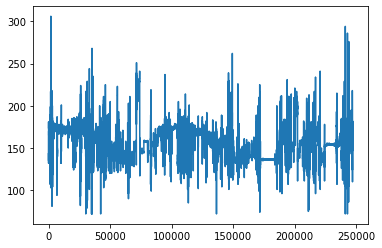

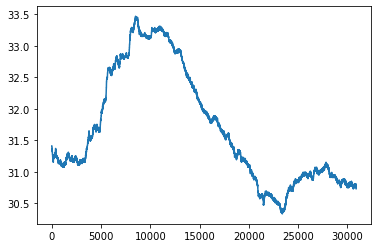

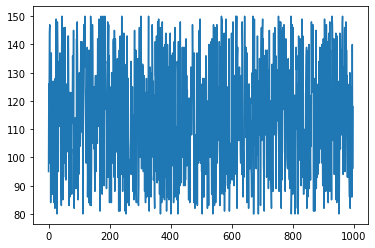

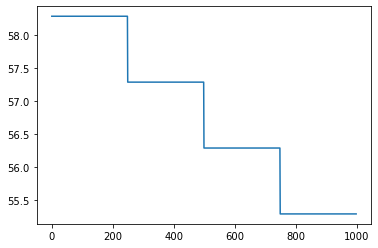

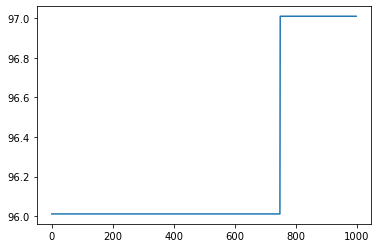

In [4]:
for df in df_list:
    plt.plot(df)
    plt.show()

In [5]:
#df_list[2]

In [6]:
for df in df_list:
    print(len(df))

7709
30894
1919
247151
30883
999
999
999


In [7]:
k_arr = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80] # Various values for 'k'

#error_thresholds = [e1, e2, e3] # Different threshold values for ECG Signal as per experts.

send = [] # Will store the values which are sent for reference.

In [13]:
#Random fixed sum generator.

def get_ai_arr(l):
    ai_arr = []
    for t in range(10):      # Generating 10 sets of 'k' random values whose sum equals to '1'        
        a = np.random.rand(l)  
        a = a/np.sum(a, axis=0)
        ai_arr.append(a)
    #print(ai_arr)
    return ai_arr
    
    

In [14]:
# This method will return the prediction failure value.

def get_pred_fail(ai, df, k, e_th):
    pred_fail = 0
        
    for i in range(k, len(df)):

        yi = df[i]
        yi_pred = 0
        for j in range(0, k):
            yi_pred += ai[j] * df[i - j - 1]

        ei = yi_pred - yi

        yi_pred += ei

        rel_dev = ((abs(yi - yi_pred))/yi) * 100

        if rel_dev > e_th:
            pred_fail += 1
            yi_pred = yi
            send.append(yi)
    return pred_fail
    #print(len(send))

    
    

In [15]:
# List to store Prediction Faliures for different combinations of 'ai' and 'k'


#This method will find the set of 'ai' which give the optimal value.
#Run this code only for single sensor data..that must be in specific column of dataset as per the Research Paper.
def sampling_frequency_train(df, k, e_th):  
    pred_fail_list = []
    
    ai_arr = get_ai_arr(k)


    for ai in ai_arr:             # Checking for different 'ai' combinations
        send = []
        
        for i in range(k):
            send.append(df[i])    # Sending initial K packets        
        
        pred_fail_list.append(get_pred_fail(ai, df, k, e_th))
    
    #print(min(pred_fail_list))
    min_pt = np.argmin(np.array(pred_fail_list))
    p_trans = min_pt/len(df)
    ai_optimal = ai_arr[min_pt]
    #print("Optimal 'ai' Values are: ", ai_optimal)
    return ai_arr, ai_optimal, pred_fail_list    
 


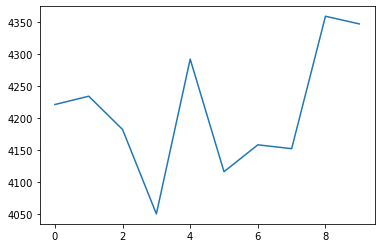

Prediction failures For Heart Rate with Error Threshold 5 : 4050
Transmission Probability  0.5253599688675574


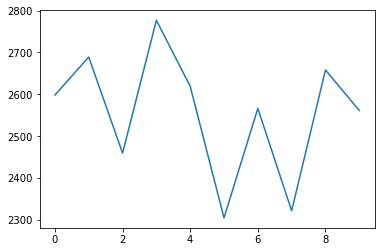

Prediction failures For Heart Rate with Error Threshold 10 : 2304
Transmission Probability  0.298871448955766


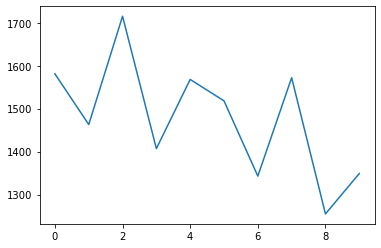

Prediction failures For Heart Rate with Error Threshold 15 : 1255
Transmission Probability  0.16279673109352705


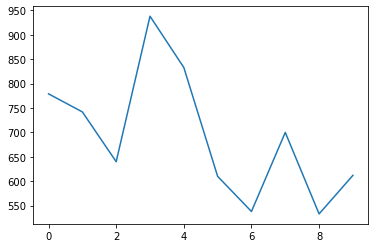

Prediction failures For Heart Rate with Error Threshold 20 : 533
Transmission Probability  0.06913996627318718


In [11]:
hr_th = [5, 10, 15, 20]

for th in hr_th:    
    ai_arr, ai_optimal, pred_fail_list = sampling_frequency_train(df_list[0], 30, th) # Pass dataframe, value of 'k' and error threshold

    plt.plot(pred_fail_list)
    plt.show()

    pf = get_pred_fail(ai_optimal, df_list[0], 30, th)
    print("Prediction failures For Heart Rate with Error Threshold {} : {}".format(th, pf))


    p_trans = pf/len(df_list[0])
    print("Transmission Probability ", p_trans)

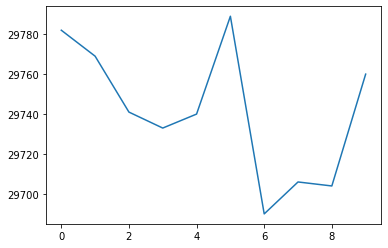

Prediction failures For electrodermal activity with Error Threshold 0.1 : 29690
Transmission Probability  0.9610280313329449


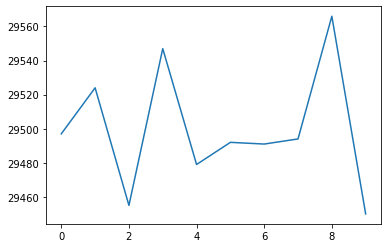

Prediction failures For electrodermal activity with Error Threshold 0.12 : 29450
Transmission Probability  0.9532595325953259


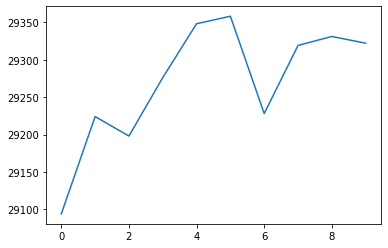

Prediction failures For electrodermal activity with Error Threshold 0.14 : 29094
Transmission Probability  0.9417362594678579


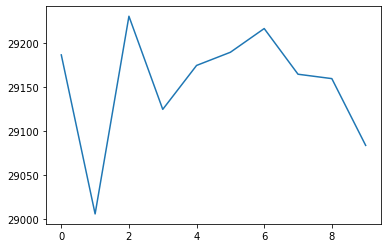

Prediction failures For electrodermal activity with Error Threshold 0.15 : 29006
Transmission Probability  0.9388878099307308


In [29]:
eda_th = [.10, .12, .14, .15]

for th in eda_th:
    ai_arr, ai_optimal, pred_fail_list = sampling_frequency_train(df_list[1], 30, th) # Pass dataframe, value of 'k' and error threshold

    plt.plot(pred_fail_list)
    plt.show()

    pf = get_pred_fail(ai_optimal, df_list[1], 30, th)
    print("Prediction failures For electrodermal activity with Error Threshold {} : {}".format(th, pf))


    p_trans = pf/len(df_list[1])
    print("Transmission Probability ", p_trans)

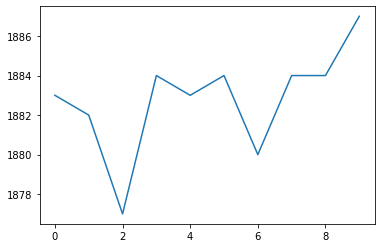

Prediction failures For Inter-Beat Interval with Error Threshold 0.12 : 1877
Transmission Probability  0.9781136008337676


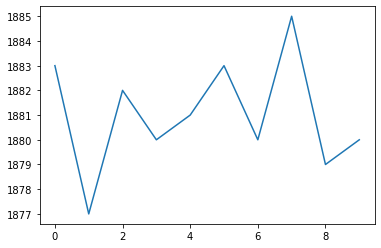

Prediction failures For Inter-Beat Interval with Error Threshold 0.14 : 1877
Transmission Probability  0.9781136008337676


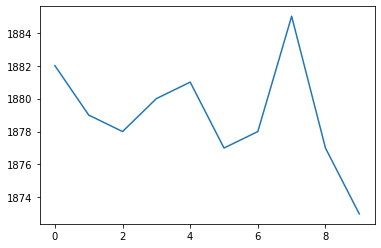

Prediction failures For Inter-Beat Interval with Error Threshold 0.16 : 1873
Transmission Probability  0.976029181865555


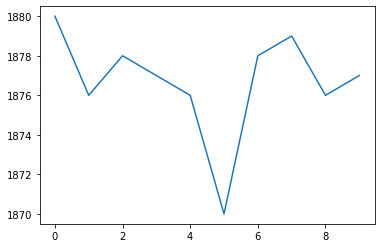

Prediction failures For Inter-Beat Interval with Error Threshold 0.18 : 1870
Transmission Probability  0.9744658676393955


In [30]:
bib_th = [.12, .14, .16, .18]

for th in bib_th:    
    ai_arr, ai_optimal, pred_fail_list = sampling_frequency_train(df_list[2], 30, th) # Pass dataframe, value of 'k' and error threshold

    plt.plot(pred_fail_list)
    plt.show()

    pf = get_pred_fail(ai_optimal, df_list[2], 30, th)
    print("Prediction failures For Inter-Beat Interval with Error Threshold {} : {}".format(th, pf))


    p_trans = pf/len(df_list[2])
    print("Transmission Probability ", p_trans)

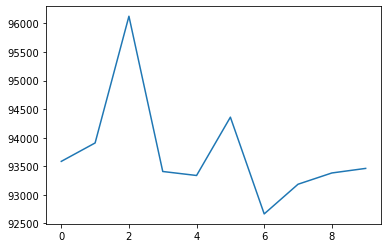

Prediction failures For Accelerometer with Error Threshold 1 : 92667
Transmission Probability  0.3749408256490971


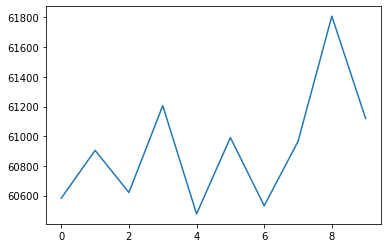

Prediction failures For Accelerometer with Error Threshold 2 : 60477
Transmission Probability  0.2446965620207889


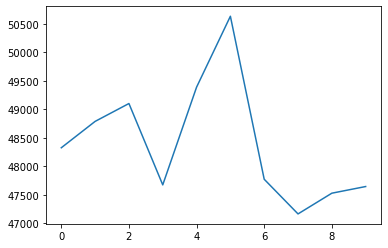

Prediction failures For Accelerometer with Error Threshold 3 : 47163
Transmission Probability  0.19082666062447654


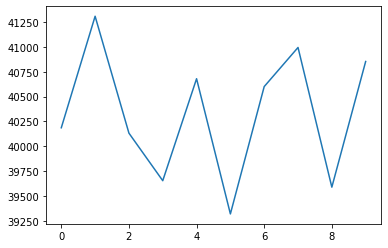

Prediction failures For Accelerometer with Error Threshold 4 : 39321
Transmission Probability  0.1590970702121375


In [31]:
acc_th = [1, 2, 3, 4]

for th in acc_th:
    
    ai_arr, ai_optimal, pred_fail_list = sampling_frequency_train(df_list[3], 30, th) # Pass dataframe, value of 'k' and error threshold

    plt.plot(pred_fail_list)
    plt.show()

    pf = get_pred_fail(ai_optimal, df_list[3], 30, th)
    print("Prediction failures For Accelerometer with Error Threshold {} : {}".format(th, pf))


    p_trans = pf/len(df_list[3])
    print("Transmission Probability ", p_trans)

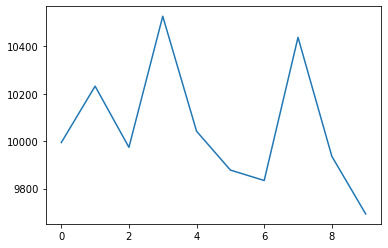

Prediction failures For Body Temprature with Error Threshold 0.1 : 9693
Transmission Probability  0.31386199527248


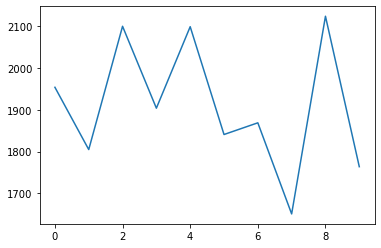

Prediction failures For Body Temprature with Error Threshold 0.2 : 1651
Transmission Probability  0.05345983227018101


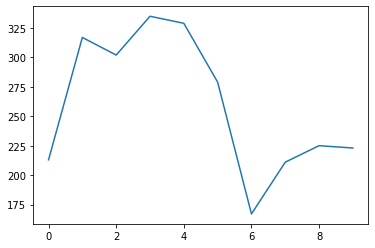

Prediction failures For Body Temprature with Error Threshold 0.3 : 167
Transmission Probability  0.005407505747498624


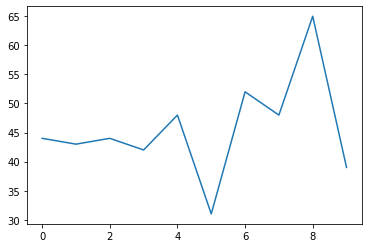

Prediction failures For Body Temprature with Error Threshold 0.4 : 31
Transmission Probability  0.0010037884920506427


In [20]:
temp_th = [.05, .1, .15, .2]

for th in temp_th:

    ai_arr, ai_optimal, pred_fail_list = sampling_frequency_train(df_list[4], 30, th) # Pass dataframe, value of 'k' and error threshold

    plt.plot(pred_fail_list)
    plt.show()

    pf = get_pred_fail(ai_optimal, df_list[4], 30, th)
    print("Prediction failures For Body Temprature with Error Threshold {} : {}".format(th, pf))


    p_trans = pf/len(df_list[4])
    print("Transmission Probability ", p_trans)

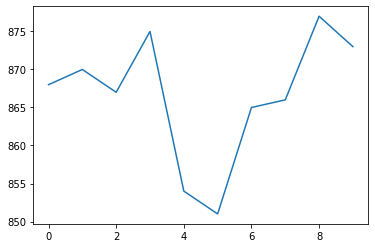

Prediction failures For Diabeties with Error Threshold 5 : 851
Transmission Probability  0.8518518518518519


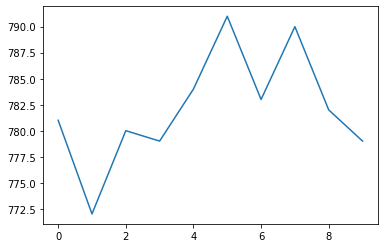

Prediction failures For Diabeties with Error Threshold 10 : 772
Transmission Probability  0.7727727727727728


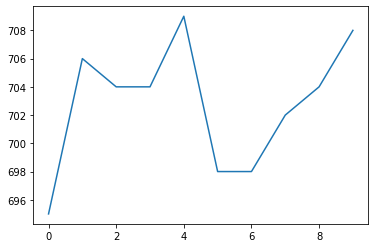

Prediction failures For Diabeties with Error Threshold 15 : 695
Transmission Probability  0.6956956956956957


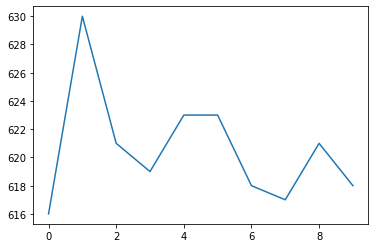

Prediction failures For Diabeties with Error Threshold 20 : 616
Transmission Probability  0.6166166166166166


In [17]:
dia_th = [5, 10, 15, 20]

for th in dia_th:

    ai_arr, ai_optimal, pred_fail_list = sampling_frequency_train(df_list[5], 50, th) # Pass dataframe, value of 'k' and error threshold

    plt.plot(pred_fail_list)
    plt.show()

    pf = get_pred_fail(ai_optimal, df_list[5], 50, th)
    print("Prediction failures For Diabeties with Error Threshold {} : {}".format(th, pf))


    p_trans = pf/len(df_list[5])
    print("Transmission Probability ", p_trans)

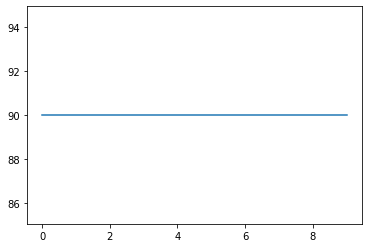

Prediction failures For Pulse Rate with Error Threshold 0.001 : 90
Transmission Probability  0.09009009009009009


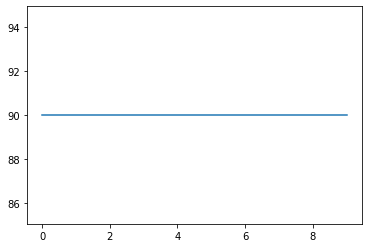

Prediction failures For Pulse Rate with Error Threshold 0.002 : 90
Transmission Probability  0.09009009009009009


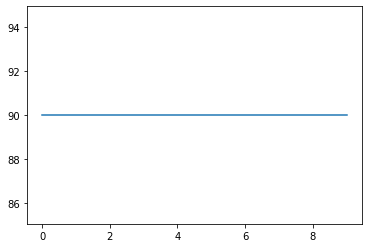

Prediction failures For Pulse Rate with Error Threshold 0.005 : 90
Transmission Probability  0.09009009009009009


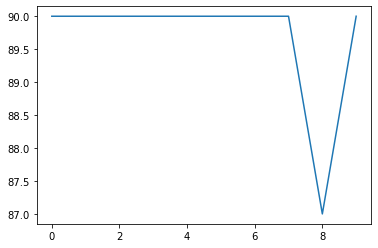

Prediction failures For Pulse Rate with Error Threshold 0.01 : 87
Transmission Probability  0.08708708708708708


In [27]:
pulse_th = [.001, .002, .005, .01]

for th in pulse_th:

    ai_arr, ai_optimal, pred_fail_list = sampling_frequency_train(df_list[6], 30, th) # Pass dataframe, value of 'k' and error threshold

    plt.plot(pred_fail_list)
    plt.show()

    pf = get_pred_fail(ai_optimal, df_list[6], 30, th)
    print("Prediction failures For Pulse Rate with Error Threshold {} : {}".format(th, pf))


    p_trans = pf/len(df_list[6])
    print("Transmission Probability ", p_trans)

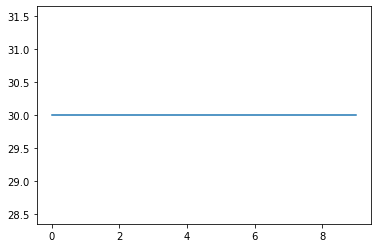

Prediction failures For SpO2 with Error Threshold 0.001 : 30
Transmission Probability  0.03003003003003003


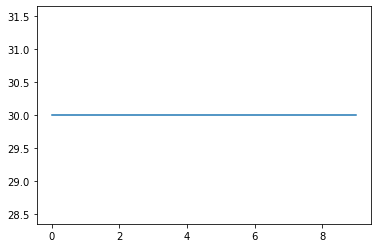

Prediction failures For SpO2 with Error Threshold 0.002 : 30
Transmission Probability  0.03003003003003003


In [28]:
spo2_th = [.001, .002]

for th in spo2_th:

    ai_arr, ai_optimal, pred_fail_list = sampling_frequency_train(df_list[7], 30, th) # Pass dataframe, value of 'k' and error threshold

    plt.plot(pred_fail_list)
    plt.show()

    pf = get_pred_fail(ai_optimal, df_list[7], 30, th)
    print("Prediction failures For SpO2 with Error Threshold {} : {}".format(th, pf))


    p_trans = pf/len(df_list[7])
    print("Transmission Probability ", p_trans)

In [120]:
'''Sampling frequency can be calculated by uncommenting this section of code.'''
#sampling_freq = packet_tras_rate * p_trans                       #----'packet_tras_rate' will depend upon the sensor.

'Sampling frequency can be calculated by uncommenting this section of code.'